In [1]:
# importing libraries:-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics

# hide warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# fetching data
df = pd.read_csv("total-electricity-consumption-us.csv")
df.head()

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651


In [3]:
# number of observations:
df.shape

(51, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Year         51 non-null     int64
 1   Consumption  51 non-null     int64
dtypes: int64(2)
memory usage: 944.0 bytes


In [5]:
# checking NA
df.isnull().sum()

Year           0
Consumption    0
dtype: int64

In [7]:
# Defining the length of the dataset:
size = len(df)
size

51

In [8]:
# Defining custom range index which ranges from 0 to size and step size as 5:
index = range(0,size,5)

In [9]:
# train will not have same index which is defined above:
train = df[~df.index.isin(index)]

In [10]:
# test will have same index which is defined above:
test = df[df.index.isin(index)]

In [11]:
# Printing training and testing length
print(len(train))
print(len(test))

40
11


In [12]:
# Converting x to a 2D array, as required by the learning algorithm
# Making xtrain two dimensional
xtrain = train.Year.values.reshape(-1,1)

# Defining ytrain
ytrain = train.Consumption

# Making xtest two dimensional
xtest = test.Year.values.reshape(-1,1)

# Defining ytest:
ytest = test.Consumption


In [13]:
# Defining empty array r2train and r2test:
r2train = []
r2test = []

# Define degrees as list with 1,2 and 3 as elements
degrees = [1,2,3]

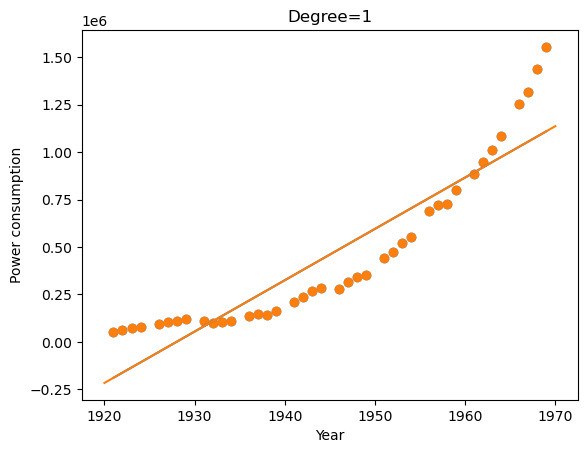

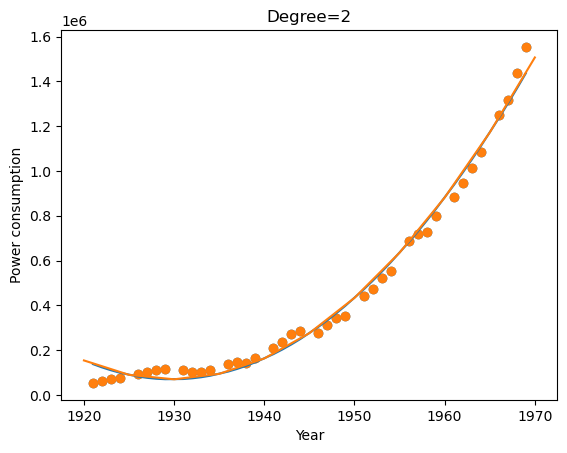

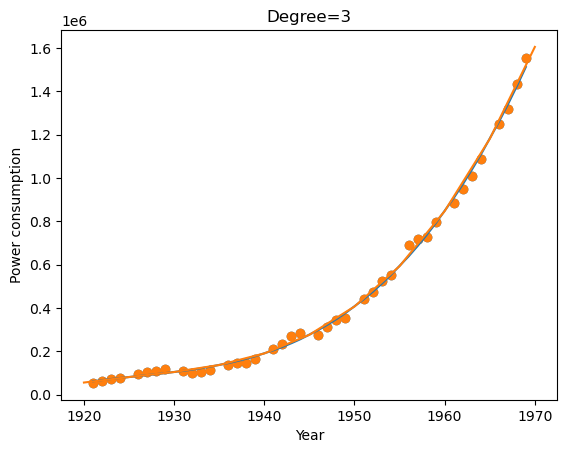

In [16]:
# Iterating over each degree value:
for degree in degrees:
    # initializing pipeline
    pipeline = Pipeline([("poly_features", PolynomialFeatures(degree=degree)),
                        ("model", LinearRegression())])
    
    # fitting pipeline with train and test
    pipeline.fit(xtrain, ytrain)
    
    # test performance
    ypred = pipeline.predict(xtest)
    
    # appending r2test with r2_score
    r2test.append(metrics.r2_score(ytest,ypred))
    
    # training performance
    ypred_train = pipeline.predict(xtrain)
    
    # appending r2train with r2_score
    r2train.append(metrics.r2_score(ytrain,ypred_train))

    # plot predictions and actual values against year
    fig, ax = plt.subplots()
    ax.set_xlabel("Year")
    ax.set_ylabel("Power consumption")
    ax.set_title("Degree=" + str(degree))
    
    # train data in blue
    ax.scatter(xtrain, ytrain)
    ax.plot(xtrain,ypred_train)
    
    # test data
    ax.scatter(xtrain,ytrain)
    ax.plot(xtest,ypred)
    
    plt.show()

In [18]:
# respective test r2 scores of predictions:
print(degrees)
print(r2train)
print(r2test)

[1, 2, 3]
[0.8423747402176137, 0.990889674455328, 0.9979789884378093]
[0.816517046382681, 0.9876080502746136, 0.9984899918580936]


# Summary:-